In [1]:
import pandas as pd
damallsvenskan = pd.read_csv('csv/damallsvenskan_all.csv')
allsvenskan = pd.read_csv('csv/allsvenskan_all.csv')

In [50]:
import math
data = []

width = 7.32
def calculate_angle(x, y):
    from numpy import arctan2, sqrt
    new_x = 120 - x
    new_y = abs(y - 40)
    # The expression for tan(theta)
    tan_theta = (width * new_x) / (new_x**2 + new_y**2 - (width/2)**2)
    
    # Calculate theta using the arctan2 function to handle the correct quadrant
    theta = arctan2(tan_theta, sqrt(1 + tan_theta**2))
    
    return math.degrees(theta)

def calculate_dist (x ,y):
    dist = ((x - 120)**2 + (y -40)**2)**0.5
    return dist


def shot_in_box (x , y):
    if (103.5 < x and 19.9 < y < 59.9):
        return True
    else:
        return False





for i in range(len(damallsvenskan) - 1):
    if damallsvenskan.iloc[i]['action'] == 'Shot' and damallsvenskan.iloc[i+1]['action'] != 'Goal':
        data.append({'x': damallsvenskan.iloc[i]['xpos'] * 1.2, 'y' : damallsvenskan.iloc[i]['ypos'] * 0.8, 'goal': 0, 'header': damallsvenskan.iloc[i]['header'], 'angle': calculate_angle(damallsvenskan.iloc[i]['xpos'], damallsvenskan.iloc[i]['ypos']), 'distance': calculate_dist(damallsvenskan.iloc[i]['xpos'], damallsvenskan.iloc[i]['ypos']), 'attack-type': damallsvenskan.iloc[i]['attack_type'], 'shot-in-box': shot_in_box(damallsvenskan.iloc[i]['xpos'],damallsvenskan.iloc[i]['ypos'])})
    elif damallsvenskan.iloc[i]['action'] == 'Shot' and damallsvenskan.iloc[i+1]['action'] == 'Goal':   
        data.append({'x': damallsvenskan.iloc[i]['xpos'] * 1.2, 'y' : damallsvenskan.iloc[i]['ypos'] * 0.8, 'goal': 1, 'header': damallsvenskan.iloc[i]['header'], 'angle': calculate_angle(damallsvenskan.iloc[i]['xpos'], damallsvenskan.iloc[i]['ypos']), 'distance': calculate_dist(damallsvenskan.iloc[i]['xpos'], damallsvenskan.iloc[i]['ypos']), 'attack-type': damallsvenskan.iloc[i]['attack_type'], 'shot-in-box': shot_in_box(damallsvenskan.iloc[i]['xpos'],damallsvenskan.iloc[i]['ypos'])})




# # Scale the x coordinates
# x_shot_coordinates_damallsvenskan_scaled = [x * 120 / 100 for x in x_shot_coordinates_damallsvenskan]
# x_goal_coordinates_damallsvenskan_scaled = [x * 120 / 100 for x in x_goal_coordinates_damallsvenskan]

# # Scale the y coordinates
# y_shot_coordinates_damallsvenskan_scaled = [y * 80 / 100 for y in y_shot_coordinates_damallsvenskan]
# y_goal_coordinates_damallsvenskan_scaled = [y * 80 / 100 for y in y_goal_coordinates_damallsvenskan]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17392 entries, 0 to 17391
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   distance     17392 non-null  float64
 1   angle        17392 non-null  float64
 2   header       17392 non-null  bool   
 3   attack-type  6597 non-null   object 
 4   shot-in-box  17392 non-null  bool   
dtypes: bool(2), float64(2), object(1)
memory usage: 441.7+ KB


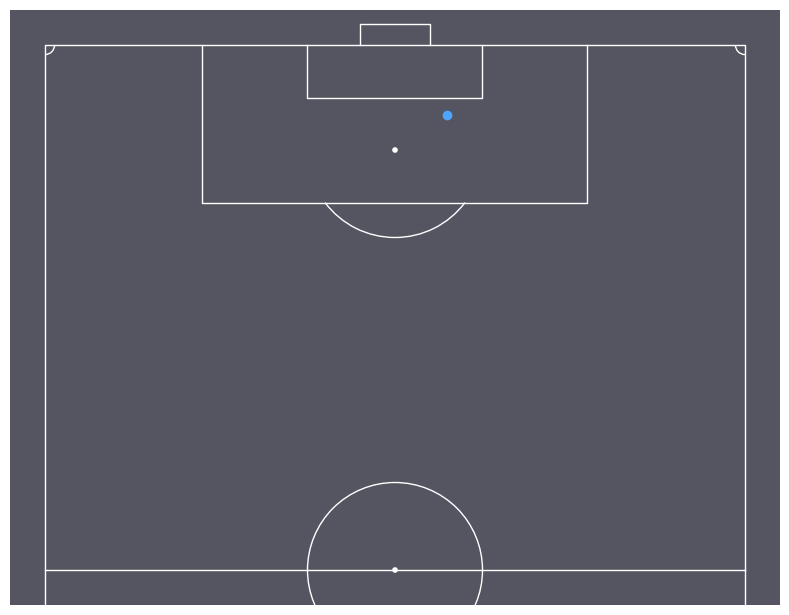

In [51]:

import pandas as pd
import numpy as np
import math
from mplsoccer import VerticalPitch, Pitch
width = 7.32
pitch = VerticalPitch(half=True, goal_type='box', corner_arcs=True, pitch_color='#545560', line_color='white', linewidth=1)

fig, ax = pitch.draw(figsize=(8,8))
sc = pitch.scatter(112, 46, 
                   ax=ax, color='#4da6ff', alpha=1.0, label='Shot')


data = pd.DataFrame(data)



# Separating the features and the target variable 
X = data[['distance','angle', 'header', 'attack-type', 'shot-in-box']]
Y = data[['goal']]

X.info()




## Logistic Regression

In [19]:

from sklearn import preprocessing

regressor = LogisticRegression(random_state=0)
# Fit the regressor with x and y data
regressor.fit(X, Y)

xG_map = np.zeros((100,80))

for x in range(100):
    for y in range(80):
        arr = np.array([calculate_dist(x,y), calculate_angle(x,y)])
        reshaped_arr = arr.reshape(1, -1)
        xG_map[x][y] = regressor.predict(reshaped_arr)



NameError: name 'LogisticRegression' is not defined

## Categorical gradient boosting

In [20]:
from catboost import Pool, CatBoostRegressor

xg_cat_boost = np.zeros((100,80))

model = CatBoostRegressor(iterations=3, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE')

train_pool = Pool(X, 
                  Y)
model.fit(train_pool)

for x in range(100):
    for y in range(80):
        arr = np.array([calculate_dist(x,y), calculate_angle(x,y), False])
        reshaped_arr = arr.reshape(1, -1)
        xg_cat_boost[x][y] = model.predict(reshaped_arr)

CatBoostError: Bad value for num_feature[non_default_doc_idx=5,feature_idx=3]="Corner": Cannot convert 'b'Corner'' to float

## Bayesian regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing

print(X)
x_normalized = preprocessing.normalize(X,norm="l2")
print(x_normalized)
reg = linear_model.BayesianRidge(compute_score=True)
reg.fit(x_normalized,Y)
xG_bayesian = np.zeros((100,80))
for x in range(100):
    for y in range(80):
        arr = np.array([calculate_dist(x,y), calculate_angle(x,y)])
        reshaped_arr = arr.reshape(1, -1)
        xG_bayesian[x][y] = reg.predict(reshaped_arr)



        distance      angle
0       7.879086  36.299641
1      15.367498  20.144519
2      14.422205  25.467230
3       8.207314  32.261448
4      11.454257  15.950743
...          ...        ...
17387  15.939887   8.219666
17388  27.364210  11.870577
17389  10.829589  31.198571
17390  36.810868  10.566286
17391  48.373546   7.876793

[17392 rows x 2 columns]
[[0.21211755 0.97724416]
 [0.60652488 0.7950645 ]
 [0.49277396 0.87015735]
 ...
 [0.32792392 0.94470414]
 [0.96118598 0.27590128]
 [0.9870007  0.16071595]]


/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_15101/151574716.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xG_bayesian[x][y] = reg.predict(reshaped_arr)
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_15101/151574716.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xG_bayesian[x][y] = reg.predict(reshaped_arr)
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_15101/151574716.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.

## Random forest

/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4126620290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['attack-type'].fillna('other', inplace=True)
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4126620290.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('attack-type', axis = 1, inplace = True)
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4126620290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

0.0643839193400233


/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4126620290.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xG_randomforest[x][y] = regr.predict(reshaped_arr)
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4126620290.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xG_randomforest[x][y] = regr.predict(reshaped_arr)
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4126620290.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecate

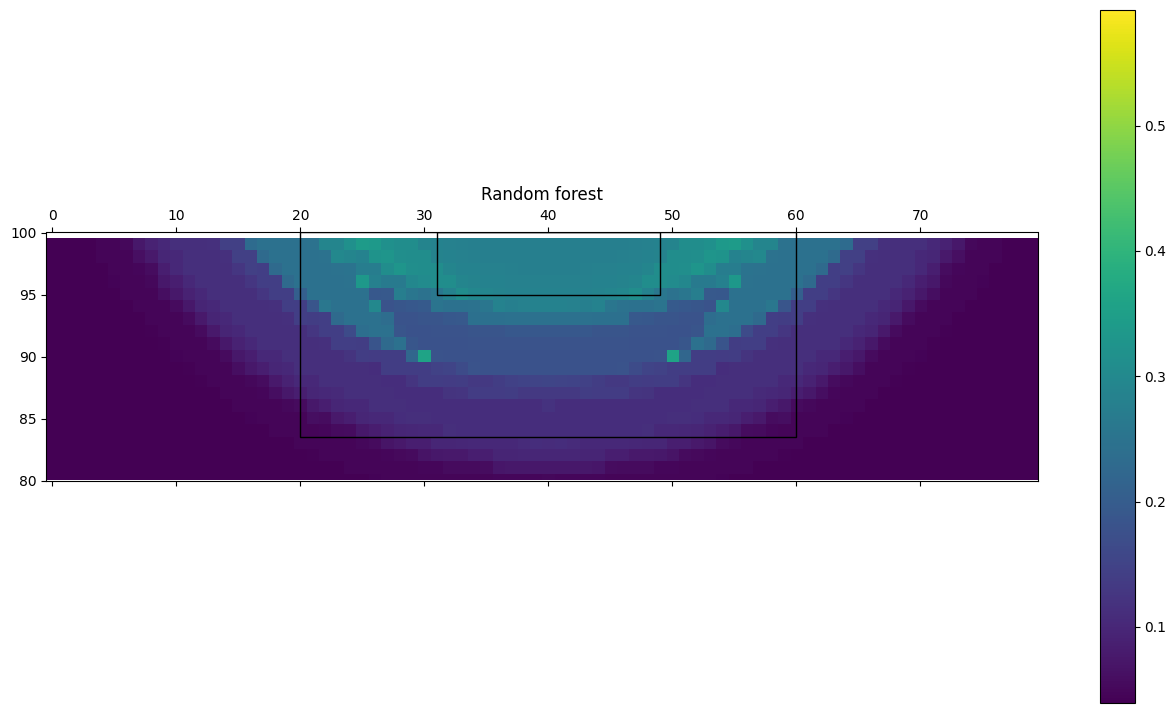

In [100]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.patches as patches
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



le = LabelEncoder()
X['attack-type'].fillna('other', inplace=True)  
le.fit(X['attack-type'])

transformed_data = le.transform(X['attack-type'])

X.drop('attack-type', axis = 1, inplace = True)

X['attack-type'] = transformed_data

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42, shuffle=True)



regr = RandomForestRegressor(max_depth= 3, random_state=0, n_estimators=100)

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

xG_randomforest = np.zeros((100,80))
for x in range(100):
    for y in range(80):
        arr = np.array([calculate_dist(x,y), calculate_angle(x,y), False ,True, 5])
        reshaped_arr = arr.reshape(1, -1)
        xG_randomforest[x][y] = regr.predict(reshaped_arr)

square = patches.Rectangle(xy=(31, 95),width= 18,height= 5, edgecolor='black', facecolor='none')
square2 = patches.Rectangle(xy=(20, 83.5),width= 40,height= 16.5, edgecolor='black', facecolor='none')

figure = plt.figure(figsize=(16,9))
axes = figure.add_subplot(1,1,1)
axes.set_title("Random forest")
axes.set_ylim(bottom=80,top=100)
caxes = axes.matshow(xG_randomforest, interpolation ='nearest', alpha = 1)
figure.colorbar(caxes)
axes.add_patch(square)
axes.add_patch(square2)





## Gradient boosting regressor

/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4053021658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['attack-type']= le.fit_transform(X['attack-type'])
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4053021658.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xG_gradient[x][y] = reg.predict(reshaped_arr)
/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_7902/4053021658.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single eleme

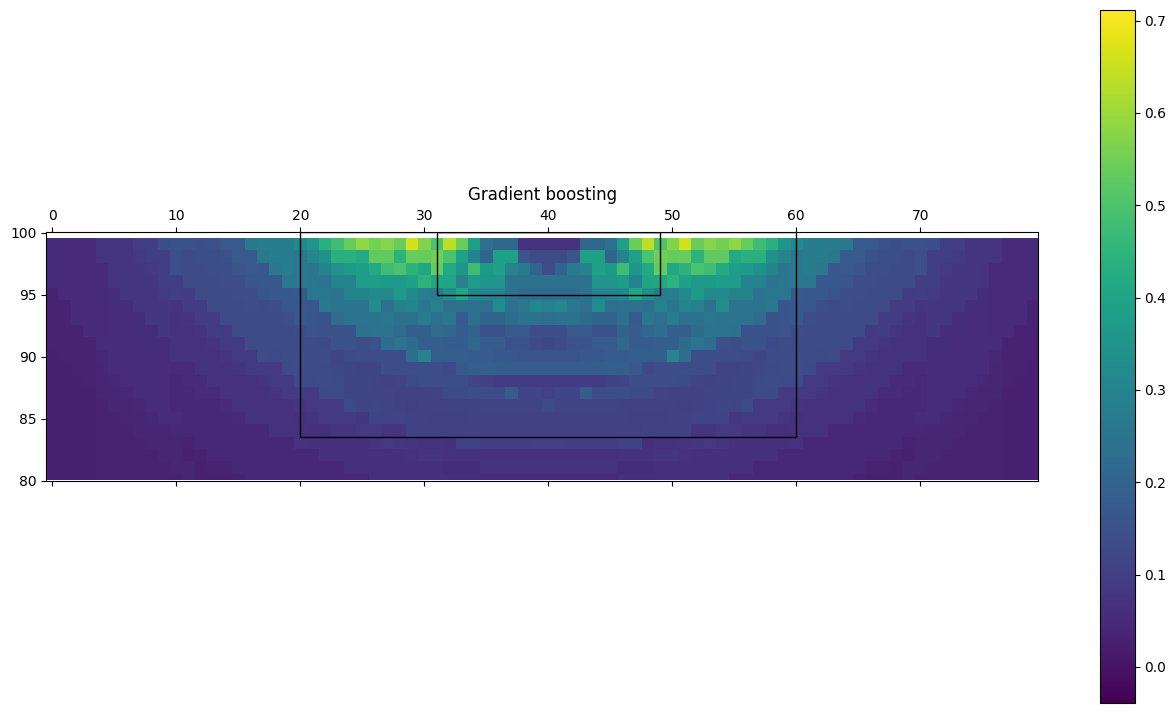

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()
X['attack-type']= le.fit_transform(X['attack-type']) 

reg = GradientBoostingRegressor(random_state=0, learning_rate=0.5, n_estimators= 400, max_depth=1)

reg.fit(X,Y)

xG_gradient = np.zeros((100,80))
for x in range(100):
    for y in range(80):
        arr = np.array([calculate_dist(x,y), calculate_angle(x,y), False, 5, shot_in_box(x,y)])
        reshaped_arr = arr.reshape(1, -1)
        xG_gradient[x][y] = reg.predict(reshaped_arr)

square = patches.Rectangle(xy=(31, 95),width= 18,height= 5, edgecolor='black', facecolor='none')
square2 = patches.Rectangle(xy=(20, 83.5),width= 40,height= 16.5, edgecolor='black', facecolor='none')

figure = plt.figure(figsize=(16,9))
axes = figure.add_subplot(1,1,1)
axes.set_title("Gradient boosting")
axes.set_ylim(bottom=80,top=100)
caxes = axes.matshow(xG_gradient, interpolation ='nearest', alpha = 1)
figure.colorbar(caxes)
axes.add_patch(square)
axes.add_patch(square2)
plt.show()


## Plotting the heatmap for the xG

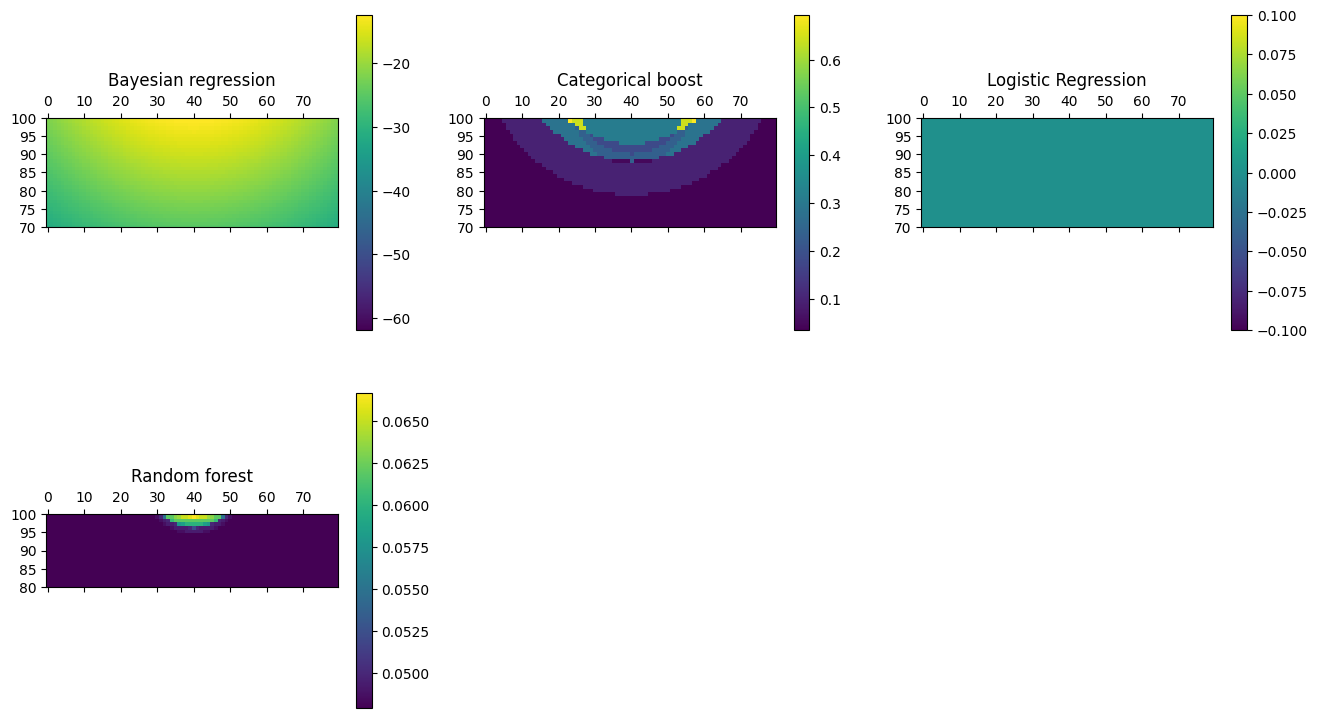

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# a 2D array with linearly increasing values on the diagonal

figure = plt.figure(figsize=(16,9))
axes = figure.add_subplot(2,3,1)
axes.set_title("Bayesian regression")
axes.set_ylim(bottom=70,top=100)
caxes = axes.matshow(xG_bayesian, interpolation ='nearest', )
figure.colorbar(caxes)


axes2 = figure.add_subplot(2,3,2)
axes2.set_title("Categorical boost")
axes2.set_ylim(bottom=70,top=100)

caxes2 = axes2.matshow(xg_cat_boost, interpolation ='nearest')
figure.colorbar(caxes2)

axes3 = figure.add_subplot(2,3,3)
axes3.set_title("Logistic Regression")
axes3.set_ylim(bottom=70,top=100)

caxes3 = axes3.matshow(xG_map, interpolation ='nearest')
figure.colorbar(caxes3)

axes4 = figure.add_subplot(2,3,4)
axes4.set_title("Random forest")
axes4.set_ylim(bottom=80,top=100)
caxes4 = axes4.matshow(xG_randomforest, interpolation ='nearest')
figure.colorbar(caxes4)
plt.show()





In [ ]:

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(X)
 
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.0251189436311402
Mean Squared Error: 0.08133839179774717
R-squared: 0.186577185953832
